**<center>Text as Data</center>**
***<center>Measurement and Classification</center>***

<center>Snorre Ralund</center>

## Agenda

* Introduction to supervised text classification
* Preprocessing and Vectorization
* Baseline models: Naive Bayes, K-nearest Neighbor and Support Vector Machines
* Simulation methods for investigating model properties and preprocessing choices.


# Text Classification

•
Assigning    subject    categories,    topics,    or    genres    
•
Spam    detection    
•
Authorship    identification    
•
Age/gender    identification    
•
Language    Identification    
•
Sentiment    analysis    


Or even better:
** Your own custom Categories ** 


## Approaches
For __***now***__ there are two paradigms to classsifying and measuring categories in Text:

* Use an existing classification scheme, and categize documents by hand (**Content Analysis** - Krippendorf 2004) and/or using *Supervised learning* (**Computational Content Analysis**)

* Simultaneously *discover*  - datadriven and model-dependent - categories (i.e. possibly interesting and useful artefacts) and measure their prevalance using *Clustering* and *Unsupervised Learning* techniques.


The only truly **valid** method is to use either supervised learning or hand coded validity test, however the unsupervised method is cheap and effective for exploration and prototyping purposes.

# Baseline models in text classification
Before you start working on complex feature engineering and deep learning models. You need a good sense of the learning task. 
    * How hard the learning task is. 
    * How well "linear" and BoW models do. Where they fails.
    * How much data you need.
    * How complex a model do you need?

**You need a baseline**
Wang and Manning (2015): *"Baselines and Bigrams: Simple, Good Sentiment and Topic Classification"* 

Point here is that many tasks are relatively easy and can be solved by simple models with simple ngram features.

The baseline models you need to know are: 
Naive Bayes, Support Vector Machines, and K-Nearest Neighbor.

## The Naive Bayes Model



Suppose we have document $i$, $(i=1, ..., N)$ with $J$ features {$\boldsymbol{x}_i = (x_{1i}, x_{2i}, ..., x_{Ji} ) $}


Set of $K$ categories.  Category $k$ $(k=1, ..., K)$ $\{C_{1}, C_{2}, ..., C_{K} \}$}


Subset of labeled documents $\boldsymbol{Y} = (Y_{1}, Y_{2}, ..., Y_{N_{\text{train}}})$ where $Y_{i} \in \{C_{1}, C_{2}, ..., C_{K} \}$.

**Goal**: classify every document into one category.


Learn a function that maps from space of (possible) documents to categories


To do this: 
* use hand coded observations to train a model
* Apply model to test data, classify those observations


So we see the Word: **Love**. 

With all the experience we have with the word love, we can now ask what is the probability of this being a positive statement.

Lets say 80 % of the time *Love* is a positive thing.

Now we see the Word: **Hurt**

In our experience this is only positive in 10 %

What is the probability that the statement is Positive?



$ \frac{P(pos|love) + P(pos|hurt)}{2} = \frac{0.2 + 0.1}{2} = 0.45 $

$ \frac{P(neg|love) + P(neg|hurt)}{2} = \frac{0.9 + 0.2}{2} = 0.55 $

We're going to use Bayes' rule to estimate $p(C_k| \boldsymbol{x}_i)$

And instead of estimating the probability of a category given a set of words, we are gonna specify a socalled Generative Model. That models x, and y and their relation at the same time.


![](https://upload.wikimedia.org/wikipedia/commons/thumb/1/18/Bayes%27_Theorem_MMB_01.jpg/1024px-Bayes%27_Theorem_MMB_01.jpg)
<center> *By mattbuck (category) - Own work by mattbuck., CC BY-SA 3.0, https://commons.wikimedia.org/w/index.php?curid=14658489*<center>

![](https://i.ytimg.com/vi/xVTogEEVmBA/maxresdefault.jpg)

$$\frac{ p(A) * p(B|A) }  { p(B)  }$$

Probability that some Category: $C_k$ given some document: $x_i$

$$p(C_k| \boldsymbol{x}_i  ) = \frac{p(C_k, \boldsymbol{x}_i)}{p(\boldsymbol{x}_i )} = \frac{ p(C_k) p(\boldsymbol{x}_i|C_k) }  { p(\boldsymbol{x}_i)  }$$


So we go through our training set and counts all the probabilities of each word given the categories.

Given a new set of words we can now estimate the probability that the collection of words was drawn from each of the categories.

At test time we say we want $C_\text{MAP}$ (Maximum a Posteriori): 

$ C_\text{map} = \text{arg max}_{k} p(C_k | \boldsymbol{x}_{i} )$

$  = \text{arg max}_{k} \frac{p(C_k)*p(\boldsymbol{x}_i|C_k)}{p(\boldsymbol{x}_i)} $

**and remove the denominator**

$ = \text{arg max}_{k} p(C_k)*p(\boldsymbol{x}_i|C_k)$



$ C_\text{map} = \text{arg max}_{k} p(C_k)*p(\boldsymbol{x}_i|C_k)$

**This all bols down to two probabilities to estimate**:
$p(C_k) = \frac{\text{No. Documents in } k } {\text{No. Documents } } $

and 


$p(\boldsymbol{x}_i|C_k) $ <-- here we have to make some assumptions

Naive Bayes means that we make the Naive assumption that each word is independent.

This means that we can write the shared probability: 

$$ p(\boldsymbol{x}_i|C_k) =  \prod_{j=1}^{J} p(x_{ij} | C_k) $$


- Use log space adding instead of multiplication, to avoid floating point precision.
$$ p(\boldsymbol{x}_i|C_k) =  \sum_{j=1}^{J} log{ p(x_{ij} | C_k)} $$

- And to avoid multiplying by zero (or adding by an undefined number). 
    * We use Laplace smoothing, so all the words that has not been seen in the training data has a minimum probability of $\alpha$.
    

## Naive Bayes(Conclusion)
- Simple but powerful model (Wang and Manning 2015).

- Robust to irrelevant features. Because they will be distributed evenly. (However the Laplace smoothing can create problems in unbalance class settings [(Frank and Bouckaert 2006)](https://www.cs.waikato.ac.nz/~eibe/pubs/FrankAndBouckaertPKDD06new.pdf)

- It is very fast, and has low storage requirements.

- Very good in domains with many equally important features    
    - Decision Trees suffer from fragmentation in such cases.

- Optimal if the independence assumptions holds.
     -... which it doesn't but n-grams will help with this assumption. 


Lets do a break and get to the code afterwards.

# Text representation for machine learning


- How do we represent text so they fit into our learning algorithms? 
    - Bag of Words (BoW)

**Problem**:
* Unigram BoW can't distinquish: "Peace, no more war". From "War, no more peace" (Source Arthur Spirling)
    


**How can we embed sequential information**?
    - Ngram representation



In [3]:
# Load dependecies
import pandas as pd 
import numpy as np
import gensim
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline
import re
import nltk

In [5]:
from nltk.corpus import stopwords, reuters
# List of document ids
documents = reuters.fileids()
 
# Load training data and test data
train_docs_id = list(filter(lambda doc: doc.startswith("train"),
                            documents))
test_docs_id = list(filter(lambda doc: doc.startswith("test"),
                           documents))

In [6]:
# Load categories

import pandas as pd
import numpy as np
categories = reuters.categories()
cat2index = {cat:num for num, cat in enumerate(categories)}
def process_categories(cats):
    "This function takes a list of named categories and converts them into a sparse indicator vector."
    vec = np.zeros(len(cat2index))
    for cat in cats:
        idx = cat2index[cat]
        vec[idx] = 1
    return vec
y_mat = []
for doc in train_docs_id:
    y_mat.append(process_categories(reuters.categories(doc)))#[reuters.categories(i) for i in train_docs_id]

y_df_train = pd.DataFrame(y_mat,columns=categories)
y_df_train.head()

,acq,alum,barley,bop,carcass,castor-oil,cocoa,coconut,coconut-oil,coffee,...,sun-oil,sunseed,tea,tin,trade,veg-oil,wheat,wpi,yen,zinc
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [52]:
y_df_train.sum().sort_values()

nkr                 1.0
lin-oil             1.0
castor-oil          1.0
groundnut-oil       1.0
sun-meal            1.0
rye                 1.0
cotton-oil          1.0
rand                2.0
nzdlr               2.0
palladium           2.0
palmkernel          2.0
dfl                 2.0
naphtha             2.0
copra-cake          2.0
cpu                 3.0
propane             3.0
potato              3.0
jet                 4.0
coconut-oil         4.0
coconut             4.0
instal-debt         5.0
sun-oil             5.0
groundnut           5.0
rape-oil            5.0
platinum            5.0
l-cattle            6.0
nickel              8.0
oat                 8.0
tea                 9.0
income              9.0
                  ...  
ipi                41.0
yen                45.0
jobs               46.0
copper             47.0
carcass            50.0
cocoa              55.0
reserves           55.0
cpi                69.0
bop                75.0
nat-gas            75.0
livestock       

In [7]:
def make_y(fileids):
    y_mat = []
    for doc in fileids:
        y_mat.append(process_categories(reuters.categories(doc)))
    return pd.DataFrame(y_mat,columns=categories)
y_df_train = make_y(train_docs_id)
y_df_test = make_y(test_docs_id)
#y_df_test.sum().sort_values()

In [9]:
# Documents
train_docs = [reuters.raw(doc_id) for doc_id in train_docs_id]
test_docs = [reuters.raw(doc_id) for doc_id in test_docs_id]

In [10]:
# lemmatizing
from nltk.corpus import wordnet

def get_wordnet_pos(treebank_tag):

    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return ''
pos_doc = nltk.pos_tag(nltk.word_tokenize(train_docs[0]))
pos_doc = [(word,get_wordnet_pos(tag)) for word,tag in pos_doc]
lemmatizer = nltk.stem.WordNetLemmatizer()
pos_stem,default_stem,words = [lemmatizer.lemmatize(word,tag) if tag!='' else word for word,tag in pos_doc],\
 [lemmatizer.lemmatize(word) for word,tag in pos_doc],\
    [word for word,tag in pos_doc]
    
list(zip(pos_stem,default_stem,words))[0:75]

[('BAHIA', 'BAHIA', 'BAHIA'),
 ('COCOA', 'COCOA', 'COCOA'),
 ('REVIEW', 'REVIEW', 'REVIEW'),
 ('Showers', 'Showers', 'Showers'),
 ('continue', 'continued', 'continued'),
 ('throughout', 'throughout', 'throughout'),
 ('the', 'the', 'the'),
 ('week', 'week', 'week'),
 ('in', 'in', 'in'),
 ('the', 'the', 'the'),
 ('Bahia', 'Bahia', 'Bahia'),
 ('cocoa', 'cocoa', 'cocoa'),
 ('zone', 'zone', 'zone'),
 (',', ',', ','),
 ('alleviate', 'alleviating', 'alleviating'),
 ('the', 'the', 'the'),
 ('drought', 'drought', 'drought'),
 ('since', 'since', 'since'),
 ('early', 'early', 'early'),
 ('January', 'January', 'January'),
 ('and', 'and', 'and'),
 ('improve', 'improving', 'improving'),
 ('prospect', 'prospect', 'prospects'),
 ('for', 'for', 'for'),
 ('the', 'the', 'the'),
 ('come', 'coming', 'coming'),
 ('temporao', 'temporao', 'temporao'),
 (',', ',', ','),
 ('although', 'although', 'although'),
 ('normal', 'normal', 'normal'),
 ('humidity', 'humidity', 'humidity'),
 ('level', 'level', 'levels'),


In [11]:
def lemmatize(words):
    pos_doc = nltk.pos_tag(words)
    pos_doc = [(word,get_wordnet_pos(tag)) for word,tag in pos_doc]
    return [lemmatizer.lemmatize(word,tag) if tag!='' else word for word,tag in pos_doc]


In [12]:
# Normalization using a function

# Define stopwords
from nltk.corpus import stopwords
stop_words_nltk = set(stopwords.words('english')) # remember to define as set for performance
#own_stop_words = set(["the","it","she","he", "a","trump",'idiot','failure','weak']) # Define your own list of stopwords

#The stemmers and lemmers need to be initialized before being run
porter = nltk.stem.porter.PorterStemmer() # 
snowball = nltk.stem.snowball.SnowballStemmer('english') # a greedy stripper


def normalize_tokens(string,
                     lowercase=False
                     ,remove_non_alpha=False
                     , stopwords = False
                     , stemmer = False
                     , lemmer = False,
                     tokenizer = nltk.word_tokenize):
    ####### Optional ######
    # Filter unwanted elements, or substitute elements using regex here.
    ## Examples: 
    ### different URLS substituted for one __link__ token
    ### numbers substituted __number__ token, or separate tokens __zipcode__, __phonenumber__, and __money__.
    
    # preprocess clean strings.
    ####### Optional ######
    
    # Split strings into words.
    words = tokenizer(string)
    # Lemmatizing
    if lemmer:
        words = lemmatize(words)
    #removing non-words
    if remove_non_alpha:
        words = [w for w in words if w.isalpha()]

    # lowering
    if lowercase:
        words = [w.lower() for w in words]
    #Now we can use the semmer, if provided
    if stemmer:
        words = [stemmer.stem(w) for w in words]
            
    #And remove the stopwords
    if stopwords:
        words = [w for w in words if w not in stopwords]
    #We will return a list with the stopwords removed
    return words
'state-of-the-art'.isalpha()


False

In [13]:
# Normalization using a Class 
class custom_tokenizer():
    def __init__(self,lowercase=False
                     ,remove_non_alpha=False
                     , stopwords = False
                     , stemmer = False
                     , lemmer = False,
                     tokenizer = nltk.word_tokenize):
        self.lowercase = lowercase
        self.tokenizer = tokenizer
        self.remove_non_alpha = remove_non_alpha
        self.lemmer = lemmer
        self.stemmer = stemmer
        self.stopwords = stopwords
        
    def tokenize(self,string):
        ####### Optional ######
        # Filter unwanted elements, or substitute elements using regex here.
        ## Examples: 
        ### different URLS substituted for one __link__ token
        ### numbers substituted __number__ token, or separate tokens __zipcode__, __phonenumber__, and __money__.

        # preprocess clean strings.
        ####### Optional ######

        # Split strings into words.
        words = self.tokenizer(string)
        # Lemmatizing
        if self.lemmer:
            words = lemmatize(words)
        #removing non-words
        if self.remove_non_alpha:
            words = [w for w in words if w.isalpha()]

        # lowering
        if self.lowercase:
            words = [w.lower() for w in words]
        #Now we can use the semmer, if provided
        if self.stemmer:
            words = [self.stemmer.stem(w) for w in words]

        #And remove the stopwords
        if self.stopwords:
            words = [w for w in words if w not in self.stopwords]
        #We will return a list with the stopwords removed
        return words

In [184]:
tokenizer.tokenize(train_docs[0])

# Experimenting with preprocessing
Lets define our experimental features.

We could try with or without stopwords to see how they affect the perfomance of the model (i.e. if regularization is effective).

We could try lemmatizing versus stemming.

Or removing rare words.

In [14]:
configurations = {'stopwords':stop_words_nltk,'stemmer':snowball,'lemmer':True,'remove_non_alpha':True}
default = {'lowercase':True,'stopwords':stop_words_nltk}
#train_docs = [normalize_tokens(string,**default) for string in tr]

In [16]:
def count_tokens(tokenized):
    c = set()
    for doc in tokenized:
        c.update(set(doc))
    return len(c)
from collections import Counter
def count_tokens2(tokenized,threshold=3):
    c = Counter()
    for doc in tokenized:
        c.update(Counter(doc))
    return len([i for i,count in c.items() if count>=threshold])

In [23]:
import time
t = time.time()
tokenized = [nltk.word_tokenize(string) for string in train_docs]
print('Tokens\tTokens>3\tMethod\tTime')
print('%d\t%d\t%s\t%r'%(count_tokens(tokenized),count_tokens2(tokenized,threshold=3),'original',time.time()-t))
for key,val in configurations.items():
    conf = {**default,**{key:val}}
    t = time.time()
    tokenizer = custom_tokenizer(**conf)
    tokenized = [tokenizer.tokenize(string) for string in train_docs]
    print('%d\t%d\t%s\t%r'%(count_tokens(tokenized),count_tokens2(tokenized,threshold=3),key,time.time()-t))


Tokens	Tokens>3	Method	Time
51167	18584	original	33.38826394081116
42146	15383	stopwords	21.56403112411499
35246	12100	stemmer	51.42014002799988
39743	13866	lemmer	229.9523470401764
23793	11724	remove_non_alpha	37.783693075180054


## Vector representation 
Bag of Words (BoW)
* Throw out the word order.
* And let each word be a feature. --> map word to an index in a matrix.


doc1: "I really love bacon"

doc2: "fuck me. Wait.. Noooo"

<center> **As a Document Term Matrix** <center>

document | fuck | noooo | love | bacon
--- | --- | --- | --- | ---
*doc1* | 0 | 0 | 1 | 1
*doc2* | 1 | 1 | 0 | 0


In [24]:
def find_ngrams(words, n):
    return Counter(zip(*[words[i:] for i in range(n)]))
def count_vectorize(tokenized,ngrams=(1,2),vocab=False,min_count=0,min_df=0.0,max_df=1.0):
    """Convert a collection of text documents to a matrix of token counts.
    vocab: set() of tokens to be kept
    min_count = int for filtering tokens based on their counts
    min_df = float for filtering tokens based on their document frequency
    max_df = float upper limit for filtering tokens based on their document frequency."""
    ############################################################################################################
    ### This is not an optimal implementation. Especially for document collections that cannot fit in memory. 
    ### If you want to store the matrix then this approach might be optimal, because indexes are optimal, but 
    ### see this for a faster implementation: https://cmry.github.io/notes/ngrams
    ############################################################################################################
    n_docs = len(tokenized)
    
    c = Counter()
    c_doc = Counter()
    for gram in ngrams:
        for words in tokenized:
            temp_grams = find_ngrams(words,gram)
            c.update(temp_grams)
            # count document frequency
            for w in temp_grams:
                c_doc[w]+=1
    # filter tokens
    if vocab:
        c = {w:count for w,count in c.items() if w in vocab}
    if min_count>0:
        c = {w:count for w,count in c.items() if count>min_count}
    if min_df:
        c = {w:count for w,count in c.items() if c_doc[w]/n_docs>min_df}
    if max_df:
        c = {w:count for w,count in c.items() if c_doc[w]/n_docs<max_df}
    token2id = Counter({w:num for num,w in enumerate(sorted(c,key=lambda x: c[x],reverse=True))})
    mat = np.zeros((n_docs,len(token2id)))
    for num,doc in enumerate(tokenized):
        for w,count in Counter(doc).items():
            idx = token2id[w]
            mat[num][idx] = count
    return mat


In [152]:
bigrams_nltk = nltk.collocations.BigramCollocationFinder.from_documents(tokenized)
    

In [ ]:
# define a vocabulary based on a collocation measure.
bigrams_nltk.above_score()
#def make_vocab(tokenized,collocation=True):
    

In [156]:
bigram_measures = nltk.collocations.BigramAssocMeasures()
print([i for i in bigrams_nltk.score_ngrams(bigram_measures.jaccard) if i[1]!=1][0:25])
print([i for i in bigrams_nltk.score_ngrams(bigram_measures.likelihood_ratio) if i[1]!=1][0:25])
print([i for i in bigrams_nltk.score_ngrams(bigram_measures.fisher) if i[1]!=1][0:25])
print([i for i in bigrams_nltk.score_ngrams(bigram_measures.pmi) if i[1]!=1][0:25])

[(('avg', 'shrs'), 0.9386861313868613), (('mechanically', 'separated'), 0.9), (('corazon', 'aquino'), 0.8888888888888888), (('wall', 'street'), 0.8846153846153846), (('hong', 'kong'), 0.8790322580645161), (('bankhaus', 'centrale'), 0.875), (('poison', 'pill'), 0.875), (('sri', 'lanka'), 0.868421052631579), (('zoete', 'wedd'), 0.8571428571428571), (('los', 'angeles'), 0.851063829787234), (('merrill', 'lynch'), 0.8484848484848485), (('der', 'vorm'), 0.8333333333333334), (('fuer', 'gemeinwirtschaft'), 0.8333333333333334), (('k', 'mart'), 0.8333333333333334), (('peat', 'marwick'), 0.8333333333333334), (('peninsular', 'oriental'), 0.8333333333333334), (('salina', 'cruz'), 0.8333333333333334), (('drexel', 'burnham'), 0.8235294117647058), (('dar', 'es'), 0.8181818181818182), (('es', 'salaam'), 0.8181818181818182), (('hawker', 'siddeley'), 0.8181818181818182), (('kitty', 'hawk'), 0.8181818181818182), (('kleinwort', 'benson'), 0.8181818181818182), (('alfalfa', 'multiyear'), 0.8), (('avian', 'in

### Sklearn's count vectorizer implementation.

In [26]:

import sklearn
vectorizer = sklearn.feature_extraction.text.CountVectorizer(ngram_range=(1,3),min_df=2,tokenizer=tokenizer)


### Test time
Now we want to get to know some properties of our different classifiers.
By simulating 


Lets first do a quick introduction

KNN: K-nearest-neighbors http://vision.stanford.edu/teaching/cs231n-demos/knn/

SVM: Support Vector Machine https://cs.stanford.edu/people/karpathy/svmjs/demo/

NBVSVM: A Support Vector Machine where the features are weighed by their probability of being in the *positive class*.

In [105]:
# Download an implementation of Nbsvm
! wget --output-document=nbsvm.py https://raw.githubusercontent.com/Joshua-Chin/nbsvm/master/nbsvm/__init__.py

--2018-04-11 22:57:39--  https://raw.githubusercontent.com/Joshua-Chin/nbsvm/master/nbsvm/__init__.py
Resolving raw.githubusercontent.com... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2024 (2.0K) [text/plain]
Saving to: 'nbsvm.py'

nbsvm.py            100%[===================>]   1.98K  --.-KB/s    in 0s      

2018-04-11 22:57:40 (19.9 MB/s) - 'nbsvm.py' saved [2024/2024]



In [153]:
# Download another implementation of Nbsvm 
! wget https://raw.githubusercontent.com/lrei/nbsvm/master/nbsvm2.py

--2018-04-12 10:40:22--  https://raw.githubusercontent.com/lrei/nbsvm/master/nbsvm2.py
Resolving raw.githubusercontent.com... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5828 (5.7K) [text/plain]
Saving to: 'nbsvm2.py'

nbsvm2.py           100%[===================>]   5.69K  --.-KB/s    in 0s      

2018-04-12 10:40:23 (21.2 MB/s) - 'nbsvm2.py' saved [5828/5828]



In [157]:
import sklearn.naive_bayes
from sklearn import svm
import nbsvm,nbsvm2
from sklearn.neighbors import KNeighborsClassifier
classifiers = {'svm':svm.LinearSVC,'nb':sklearn.naive_bayes.BernoulliNB,'knn':KNeighborsClassifier,'nbsvm':nbsvm.NBSVM,'nbsvm2':nbsvm2.NBSVM}#,'svm_rbf':svm.SVC}

In [110]:
import sklearn.naive_bayes
from sklearn import svm
import nbsvm
from sklearn.neighbors import KNeighborsClassifier
classifiers = {'svm':svm.LinearSVC,'nb':sklearn.naive_bayes.BernoulliNB,'knn':KNeighborsClassifier,'nbsvm':nbsvm.NBSVM}#,'svm_rbf':svm.SVC}

In [111]:
test_results = []

In [159]:
test_results2 = []

In [160]:
# bag of words. Indexed.
import time
import random
import tqdm
import sklearn.metrics
for key,val in tqdm.tqdm(configurations.items()):
    conf = {**default,**{key:val}}
    tokenizer = custom_tokenizer(**conf)
    for gram in range(1,3):
        vectorizer = sklearn.feature_extraction.text.CountVectorizer(ngram_range=(1,gram),min_df=3,tokenizer=tokenizer.tokenize)
        # load documents
        vectorizer.fit(train_docs)
        n_features = len(vectorizer.vocabulary_)
        mat_train = vectorizer.transform(train_docs)
        mat_test = vectorizer.transform(test_docs)
        print('Vectorized...')
        for classifier in classifiers:
            print(classifier,end='')
            for y_col in ['acq','earn','money-fx']: # or y_df_train.sum().sort_values()[-3:]
                y_train = y_df_train[y_col]
                if classifier == 'nbsvm': # slow classifier
                    size = len(y_train)
                    t = time.time()
                    clf.fit(mat_train,y_train)
                    train_time = time.time()-t
                    # test classifier
                    y_test = y_df_test[y_col]
                    pred = clf.predict(mat_test)
                    infer_time = time.time() - t
                    f1 = sklearn.metrics.f1_score(y_test,pred)
                    accuracy = sklearn.metrics.accuracy_score(y_test,pred)
                    precision = sklearn.metrics.precision_score(y_test,pred)
                    recall = sklearn.metrics.recall_score(y_test,pred)
                    datapoint = {'train_time':train_time,'infer_time':infer_time,
                                 'vocab_size':n_features,'training_size':size,'f1':f1,
                                 'accuracy':accuracy,'precision':precision,'recall':recall,
                                 'clf':classifier,'category':y_col,'preprocessing':conf,'ngram':gram}
                    test_results2.append(datapoint)
                    continue
                elif classifier == 'nbsvm2': # slow classifier
                    size = len(y_train)
                    t = time.time()
                    clf.fit(mat_train,y_train)
                    train_time = time.time()-t
                    # test classifier
                    y_test = y_df_test[y_col]
                    pred = clf.predict(mat_test)
                    infer_time = time.time() - t
                    f1 = sklearn.metrics.f1_score(y_test,pred)
                    accuracy = sklearn.metrics.accuracy_score(y_test,pred)
                    precision = sklearn.metrics.precision_score(y_test,pred)
                    recall = sklearn.metrics.recall_score(y_test,pred)
                    datapoint = {'train_time':train_time,'infer_time':infer_time,
                                 'vocab_size':n_features,'training_size':size,'f1':f1,
                                 'accuracy':accuracy,'precision':precision,'recall':recall,
                                 'clf':classifier,'category':y_col,'preprocessing':conf,'ngram':gram}
                    test_results2.append(datapoint)
                    continue
                for size in range(500,len(y_train)+500,500):
                    for iteration in range(1):
                        print(' -',end='')
                        
                        clf = classifiers[classifier]()
                        ### train classifier
                        # Pick random sample
                        idx = random.sample(list(range(mat_train.shape[0])),min([len(y_train),size]))
                        temp_train = mat_train[idx]
                        temp_y = y_train[idx]
                        # log train time
                        t = time.time()
                        clf.fit(temp_train,temp_y)
                        train_time = time.time()-t
                        t = time.time()
                        # test classifier
                        y_test = y_df_test[y_col]
                        pred = clf.predict(mat_test)
                        # log inference time
                        infer_time = time.time() - t 
                        f1 = sklearn.metrics.f1_score(y_test,pred)
                        accuracy = sklearn.metrics.accuracy_score(y_test,pred)
                        precision = sklearn.metrics.precision_score(y_test,pred)
                        recall = sklearn.metrics.recall_score(y_test,pred)
                        datapoint = {'train_time':train_time,'infer_time':infer_time,
                                     'vocab_size':n_features,'training_size':size,
                                     'f1':f1,'accuracy':accuracy,'precision':precision,'recall':recall,
                                     'clf':classifier,'category':y_col,'preprocessing':conf,'ngram':gram}
                        test_results2.append(datapoint)


  0%|          | 0/4 [00:00<?, ?it/s]
Exception in thread Thread-16:
Traceback (most recent call last):
  File "/Users/axelengbergpallesen/anaconda/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/Users/axelengbergpallesen/anaconda/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/Users/axelengbergpallesen/anaconda/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



Vectorized...
svm - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -nb - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -knn - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -nbsvmnbsvm2Vectorized...
svm - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -nb - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

/Users/axelengbergpallesen/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/axelengbergpallesen/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


 - - - - - - - - - - - - - -knn - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -nbsvmnbsvm2

 25%|██▌       | 1/4 [07:11<21:35, 431.81s/it]

Vectorized...
svm - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -nb - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -knn - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -nbsvmnbsvm2Vectorized...
svm - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -nb - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -knn - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -nbsvmnbsvm2

 50%|█████     | 2/4 [17:09<17:09, 514.80s/it]

Vectorized...
svm - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -nb - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -knn - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -nbsvmnbsvm2Vectorized...
svm - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -nb - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -knn - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -nbsvmnbsvm2

 75%|███████▌  | 3/4 [34:52<11:37, 697.37s/it]

Vectorized...
svm - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -nb - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -knn - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -nbsvmnbsvm2Vectorized...
svm - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -nb - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -knn - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -nbsvmnbsvm2

100%|██████████| 4/4 [39:38<00:00, 594.74s/it]


In [148]:
# Helper to allow serialization of the configuration dictionaries.
import json
new_results = []
for result in test_results:
    new_result = result.copy()
    new_result['preprocessing']['stopwords'] = True
    if 'stemmer' in new_result['preprocessing']:
        new_result['preprocessing']['stemmer'] = True
    if 'lemmer' in new_result['preprocessing']:
        new_result['preprocessing']['lemmer'] = True
    new_result['preprocessing']['stopwords'] = True
    new_result['preprocessing'] = json.dumps(new_result['preprocessing'])
    
    new_results.append(new_result)
test_df = pd.DataFrame(new_results)
test_df.to_csv('test_results.csv',index=False)

In [162]:
# Helper to allow serialization of the configuration dictionaries.
import json
new_results = []
for result in test_results2:
#    result['preprocessing']['stopwords'] = True
    new_result = result.copy()
    new_result['preprocessing']['stopwords'] = True
    if 'stemmer' in new_result['preprocessing']:
        new_result['preprocessing']['stemmer'] = True
    if 'lemmer' in new_result['preprocessing']:
        new_result['preprocessing']['lemmer'] = True
    new_result['preprocessing']['stopwords'] = True
    new_result['preprocessing'] = json.dumps(new_result['preprocessing'])
    
    new_results.append(new_result)
test_df = pd.DataFrame(new_results)
test_df.to_csv('test_results2.csv',index=False)

In [163]:
# Helper function to clean up preprocessing column
import json
# First we will rename the preprocessing column
def rename_preprocessing(js):
    "This function will remove the default settings, that was not experimented with"
    js = json.loads(js)
    del js['stopwords']
    del js['lowercase']
    return json.dumps(js).strip('{} ')
test_df['preprocessing'] = test_df.preprocessing.apply(rename_preprocessing)

# Analyze Test Results

In [164]:
for num,cat in enumerate(test_df.category.unique()):
    temp_df = test_df[test_df['category']==cat]
    mean_accuracy = temp_df.accuracy.mean()
    mean_f1 = temp_df.f1.mean()
    print(cat,mean_accuracy)#,mean_f1)


acq 0.9236676051672742
earn 0.9299519708512745
money-fx 0.9502360052997684


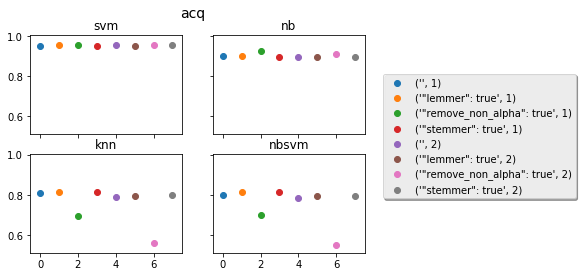

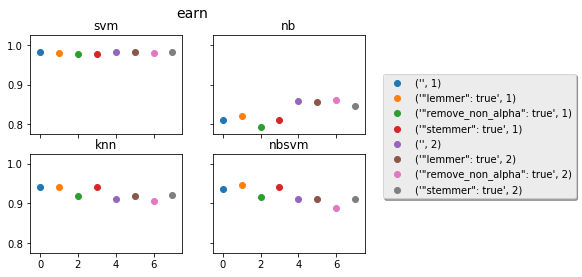

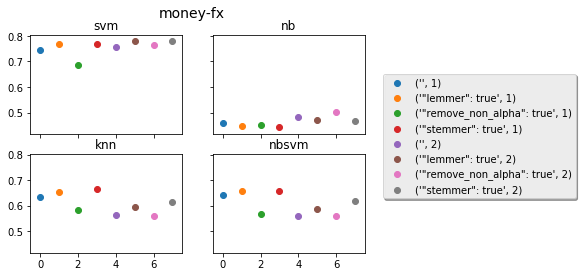

In [180]:
test_df = test_df[test_df['clf']!='nbsvm2']
nclassifiers = test_df.clf.nunique()
rows,cols = 2,2
# plot effects of preprocessing
for clf_task in test_df.category.unique():
    fig,axes = plt.subplots(nrows=rows,ncols = cols,sharex=True,sharey=True)
    for num,clf in enumerate(test_df.clf.unique()):
        temp_df = test_df[test_df['clf']==clf]
        temp_df = temp_df[temp_df['category']==clf_task]
        temp_df = temp_df[temp_df.training_size>7000]
        # 0.95 percentile
        groups = temp_df.groupby(['preprocessing','ngram'])
       # print(clf,groups.apply(lambda x: x.f1.quantile(0.95)))
        row = num//2
        col = num%cols
        ax = axes[row][col]
        labels = []
        xs = []
        for num,(key,val) in enumerate(sorted(groups.apply(lambda x: x.f1.quantile(0.95)).items(),key=lambda x:x[0][1])):
            labels.append(key)
            xs.append(num)
            ax.scatter([num],[val],label=key)
            ax.set_title(clf)
    fig.suptitle(clf_task, fontsize=14)
    plt.legend(loc='lower center', bbox_to_anchor=(1.75, 0.5),
      ncol=1, fancybox=True, shadow=True)

## Comparing Learning Curves

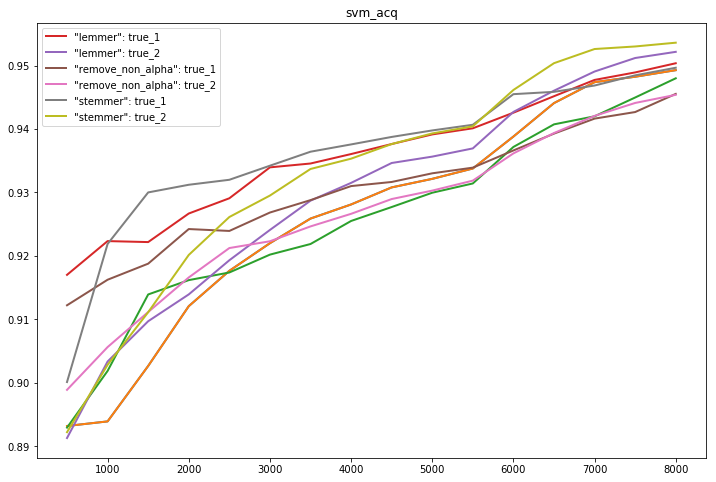

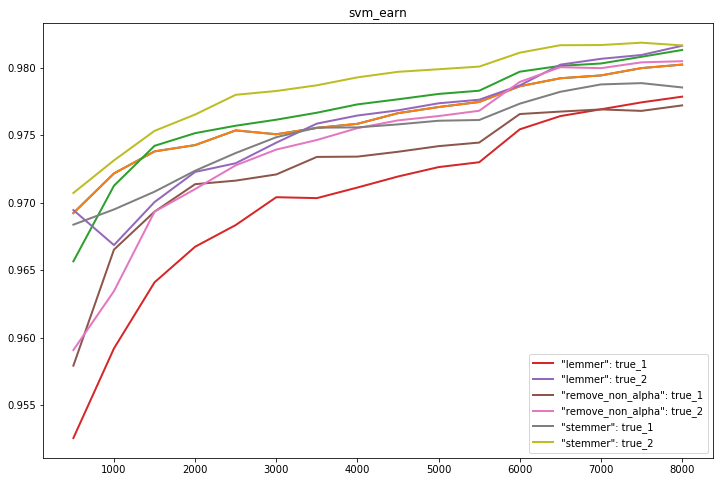

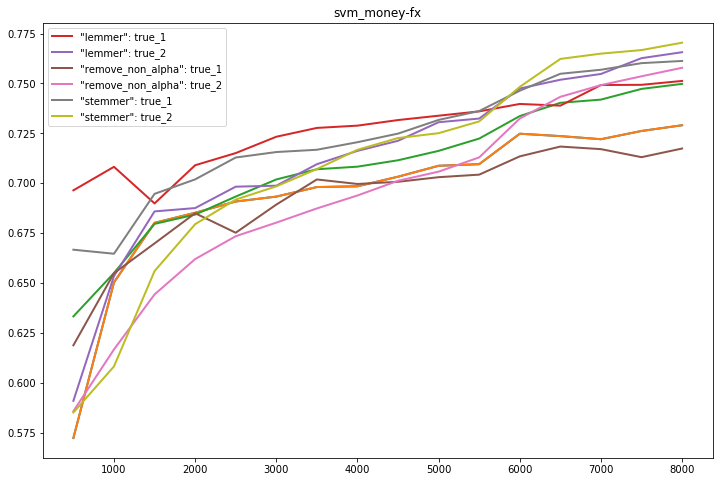

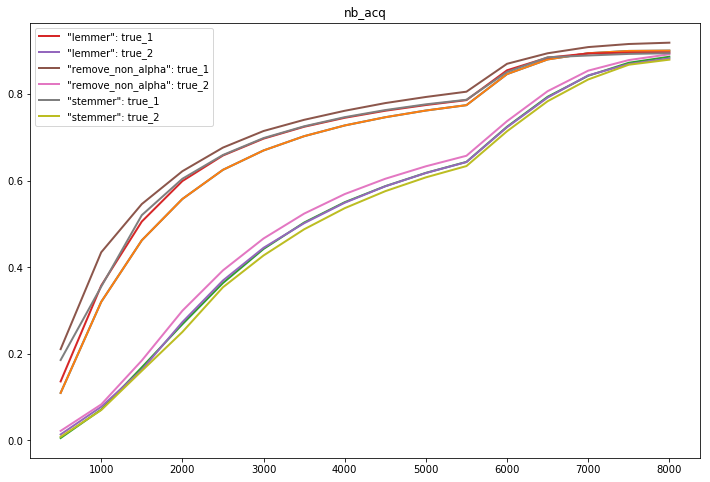

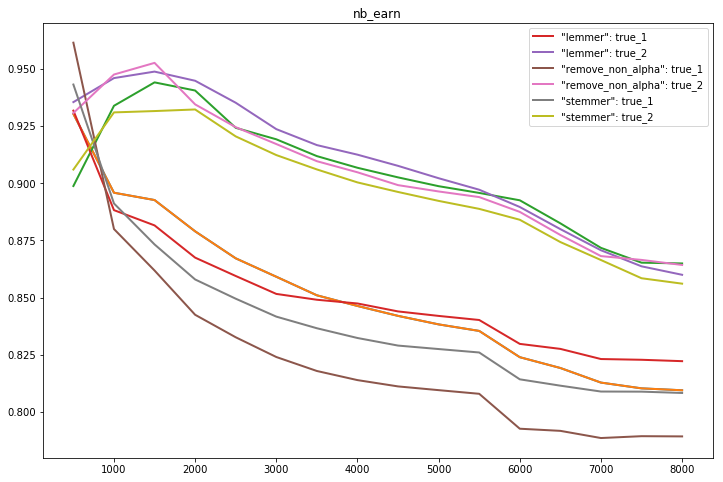

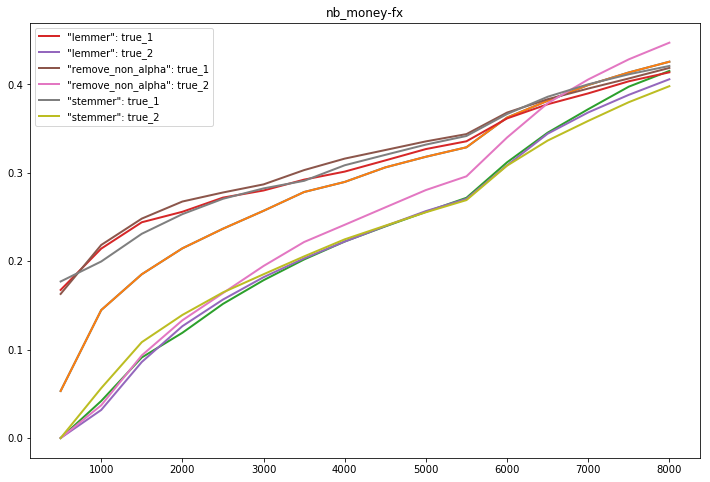

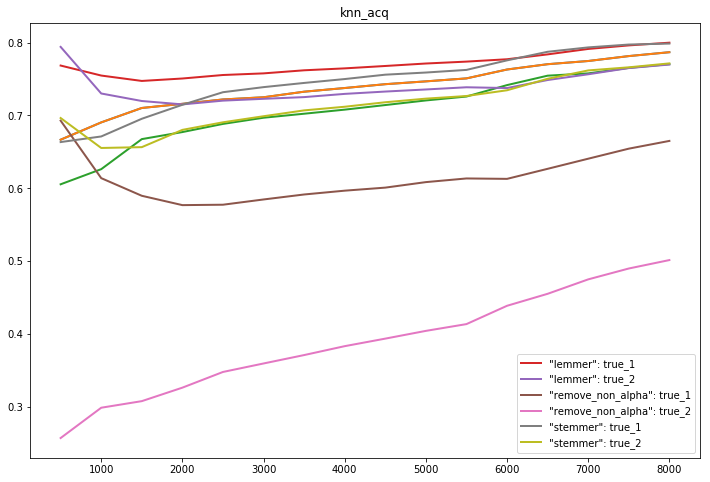

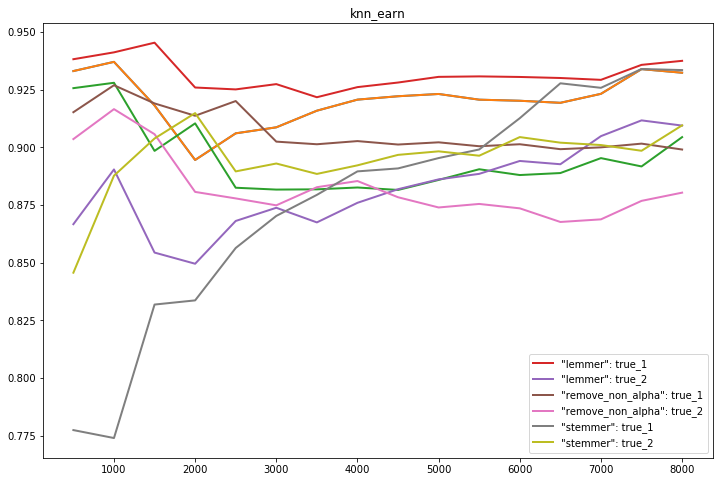

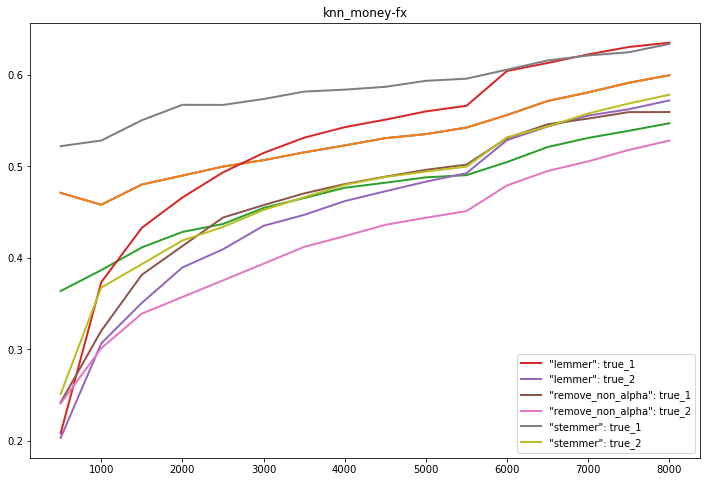

In [167]:
import numpy as np
def rolling_mean(y,window=10):
    return [np.mean(y[i-min([i,window]):i+1]) for i in range(len(y))]

def plot_learning_curve(df,measure='f1'):
#    cat = df.category.values[0]
    ngram = df['ngram'].values[0]
    pre = df['preprocessing'].values[0]
    df = df.sort_values('training_size')
    plt.plot(df['training_size'],rolling_mean(df[measure]),lw=2,label='_'.join(map(str,[pre,ngram])))
    #plt.scatter(df['training_size'],df[measure],label='_'.join(map(str,[pre,ngram])))
# plot learning curve.
for clf in test_df.clf.unique():
    if 'nbsvm' in clf:
        continue
    for clf_task in test_df.category.unique():
        temp_df = test_df[test_df['clf']==clf]
        temp_df = temp_df[temp_df['category']==clf_task]
        plt.figure(figsize=(12,8))
#        fig.set_size_inches(12,8)
        temp_df.groupby(['preprocessing','ngram']).apply(plot_learning_curve)
        plt.title(clf+'_'+clf_task)
        plt.legend()

In [172]:
test_df[test_df.training_size>7000].groupby('clf').f1.mean()

clf
knn       0.761241
nb        0.733087
nbsvm     0.760396
nbsvm2    0.760396
svm       0.895864
Name: f1, dtype: float64

## Comparing the precision and recall learning curves to exhibit class imbalance problems.

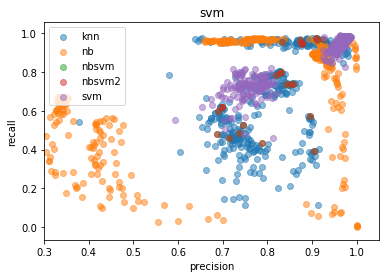

In [168]:
for group,groupdf in test_df.groupby('clf'):
    plt.scatter(groupdf['precision'],groupdf['recall'],label=group,alpha=0.5)
    plt.title(group)
    plt.xlim(0.3,1.05)
    plt.xlabel('precision')
    plt.ylabel('recall')
plt.legend()
    

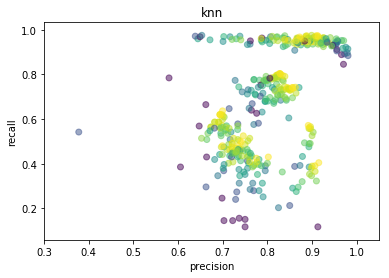

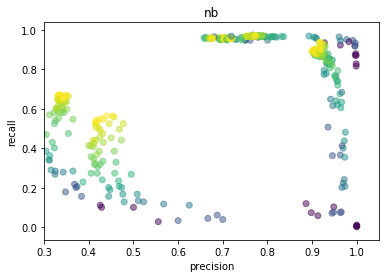

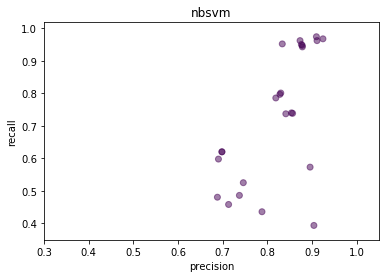

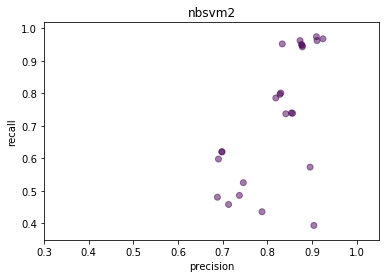

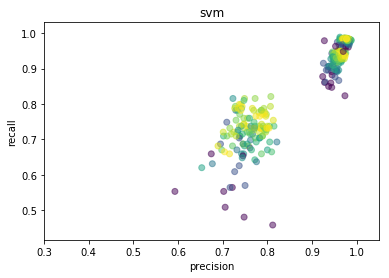

In [169]:
for group,groupdf in test_df.groupby('clf'):
    plt.figure()
    plt.scatter(groupdf['precision'],groupdf['recall'],c=groupdf.training_size.apply(np.log)*10,label=group,alpha=0.5)
    plt.title(group)
    plt.xlim(0.3,1.05)
    plt.xlabel('precision')
    plt.ylabel('recall')
#plt.legend()
    

# Streaming big text data
Gensim is a python library for doing unsupervised learning on text. 

It is designed around streaming data instead of loading it all from disk, and therefore works really well for big text collections.

It is not the most effective setup, but if you want to use the unsupervised learning models then you need to conform.

In [ ]:
# for streaming documents use Gensim


class DocumentStream(object): 
    # Defines a class for streaming data from disk.
    # This specific one reads lines from a file, so this should adopted to your data(-base) setup.
    def __init__(self, filename,tokenizer):
        self.filename = filename
        self.tokenizer = tokenizer
    def __iter__(self):
        for line in codecs.open(self.filename, 'r','utf-8'):
            ll = [i for i in tokenizer.tokenize(line)]
            yield ll


filename = 'read_docs_from_disk_test'
#### Gensims implementation of Collocations and Bigram creation
# First you train your "phraser"- i.e. provide it with data to calculate collocation stats on.
phrases = Phrases(DocumentStream(filename)) ## https://radimrehurek.com/gensim/models/phrases.html

#documents = [normalize_tokens(doc) for doc in train_docs]
# Provide the phrases/collocation to a phraser, that transforms a sequences of tokens to phrases.
bigram = gensim.models.Phraser(phrases)

# Then you make a new DocumentStream now with phrases incorporated.
class DocumentStream_Phrases(object): 
    # Defines a class for streaming data from disk.
    # This specific one reads lines from a file, so this should adopted to your data(-base) setup.
    def __init__(self, filename,tokenizer):
        self.filename = filename
        self.tokenizer = tokenizer
    def __iter__(self):
        for line in codecs.open(self.filename, 'r','utf-8'):
            ll = [i for i in self.tokenizer.tokenize(line)]
            ll = bigram[ll]
            yield ll

# To represent it as document term matrix. You need to map each token to an index using the Dictionary function.
D = gensim.corpora.Dictionary(DocumentStream_Phrases(tokenizer))

# And now you can stream BoWs.
class BoW_Stream_Phrases(object): 
    # Defines a class for streaming data from disk.
    # This specific one reads lines from a file, so this should adopted to your data(-base) setup.
    def __init__(self, filename,tokenizer):
        self.filename = filename
        self.tokenizer = tokenizer
    def __iter__(self):
        for line in codecs.open(self.filename, 'r','utf-8'):
            ll = [i for i in self.tokenizer.tokenize(line)]
            ll = bigram[ll]
            ll = D.doc2bow(ll)
            yield ll
for bow in BoW_Stream_Phrases(tokenizer):
    # do something with it. 
    ## Feed it to Gensims Topic Modelling Modules
    ### OR
    ### Simply write the bow to a file.